# Reproducibility Study of “Studying How to Efficiently and Effectively Guide Models with Explanations”

Description: This file is part of a project aiming to reproduce the study titled "Studying How to Efficiently and 
Effectively Guide Models with Explanations." The project focuses on verifying the results and methodologies 
proposed in the original study, and potentially extending or refining the study's findings.

Based on the code of orginal paper: https://github.com/sukrutrao/Model-Guidance

### 1. Load the data

In [10]:
import sys
import argparse

sys.path.append('datasets/VOC2007/')

from preprocess import main

data_root = "datasets/VOC2007/"
split = "train"
save_path = "datasets/VOC2007/processed/"

args = {
    "data_root": data_root,
    "split": split,
    "save_path": save_path
}

args = argparse.Namespace(**args)

main(args)

Using downloaded and verified file: datasets/VOC2007/VOCtrainval_06-Nov-2007.tar
Extracting datasets/VOC2007/VOCtrainval_06-Nov-2007.tar to datasets/VOC2007/


100%|██████████| 2501/2501 [00:07<00:00, 314.54it/s]


In [5]:
import sys
import argparse

sys.path.append('datasets/VOC2007/')

from preprocess import main

data_root = "datasets/VOC2007/"
split = "val"
save_path = "datasets/VOC2007/processed/"

args = {
    "data_root": data_root,
    "split": split,
    "save_path": save_path
}

args = argparse.Namespace(**args)

main(args)

Using downloaded and verified file: datasets/VOC2007/VOCtrainval_06-Nov-2007.tar
Extracting datasets/VOC2007/VOCtrainval_06-Nov-2007.tar to datasets/VOC2007/
100%|██████████████████████████████████████| 2510/2510 [00:07<00:00, 317.68it/s]


In [6]:
import sys
import argparse

sys.path.append('datasets/VOC2007/')

from preprocess import main

data_root = "datasets/VOC2007/"
split = "test"
save_path = "datasets/VOC2007/processed/"

args = {
    "data_root": data_root,
    "split": split,
    "save_path": save_path
}

args = argparse.Namespace(**args)

main(args)

100%|███████████████████████| 451020800/451020800 [00:18<00:00, 24908663.25it/s]
Extracting datasets/VOC2007/VOCtest_06-Nov-2007.tar to datasets/VOC2007/
100%|██████████████████████████████████████| 4952/4952 [00:15<00:00, 320.63it/s]


### 2. Train the fine-tuned model on the base model

For the fine-tuned model, due to computational resource limitation, we only train on 5 epochs and a batch size of 16.

In [14]:
from train import main

data_path = "datasets/"
localization_loss_fn = "Energy"
layer = "Final"
localization_loss_lambda = 1e-3
save_path = "./EXAMPLE_FT"
seed = 0
model_backbone = "vanilla"
total_epochs = 5
learning_rate = 1e-4
log_path = "./example_finetune_logs"
train_batch_size = 16
dataset = "VOC2007"
attribution_method = "IxG"
optimize_explanations = True
pareto = True
model_path = "BASE/VOC2007/vanilla_standard_attrNone_loclossNone_origNone_resnet50_lr1e-05_sll1.0_layerInput/model_checkpoint_f1_best.pt"
annotated_fraction = 1.0
evaluation_frequency = 1
eval_batch_size = 4
box_dilation_percentage = 0
pareto_metric = "EPG_IOU"

args = {
    "data_path": data_path,
    "localization_loss_fn": localization_loss_fn,
    "layer": layer,
    "localization_loss_lambda": localization_loss_lambda,
    "save_path": save_path,
    "seed": seed,
    "model_backbone": model_backbone,
    "total_epochs": total_epochs,
    "learning_rate": learning_rate,
    "log_path": log_path,
    "train_batch_size": train_batch_size,
    "dataset": dataset,
    "attribution_method": attribution_method,
    "optimize_explanations": optimize_explanations,
    "pareto": pareto,
    "model_path": model_path,
    "annotated_fraction": annotated_fraction,
    "evaluation_frequency": evaluation_frequency,
    "eval_batch_size": eval_batch_size,
    "box_dilation_percentage": box_dilation_percentage,
    "pareto_metric": pareto_metric
}

args = argparse.Namespace(**args)

main(args)

Train data size: 2501
Annotated: 2501, Total: 2501


  0%|          | 0/5 [00:00<?, ?it/s]/home/roan/anaconda3/envs/FACTifAI/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at /opt/conda/conda-bld/pytorch_1695392020201/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,
100%|██████████| 157/157 [00:36<00:00,  4.27it/s]


Epoch: 0, Average Loss: 0.03449605405330658


 20%|██        | 1/5 [01:02<04:10, 62.56s/it]

Validation Metrics: {'Accuracy': 0.9652390480041504, 'Precision': 0.8100317120552063, 'Recall': 0.7212525606155396, 'F-Score': 0.7630685567855835, 'True Positives': 2810.0, 'True Negatives': 45645.0, 'False Positives': 659.0, 'False Negatives': 1086.0, 'BB-Loc': 0.48986793091871655, 'BB-IoU': 0.3316727806949468, 'BB-IoU-Adapt': 0.1437896688291274, 'Average-Loss': 0.12046779921330304}
Current Pareto Front Size: 1
Pareto Costs: (F1:0.7631, EPG:0.4899, IOU:0.3317, MOD1)


### 3. Evaluate the fine-tuned model on the test set

In [3]:
from eval import evaluation_function

model_path = './EXAMPLE_FT/VOC2007/vanilla_finetunedobjlocpareto_attrIxG_loclossEnergy_origmodel_checkpoint_f1_best.pt_resnet50_lr0.0001_sll0.001_layerFinal/model_checkpoint_f1_best.pt'

split = 'test'

mode = 'bbs'

dataset = 'VOC2007'

# Create kwargs for evaluation function
args = {'model_path': model_path,
        'split': split,
        'mode': mode,
        'dataset': dataset}

# Evaluate
evaluation_function(**args)

Found model with specs:  vanilla Energy Final IxG VOC2007


  0%|          | 0/1238 [00:00<?, ?it/s]/home/roan/anaconda3/envs/FACTifAI/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at /opt/conda/conda-bld/pytorch_1695392020201/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,
100%|██████████| 1238/1238 [03:26<00:00,  6.00it/s]


Validation Metrics: {'Accuracy': 0.9689317345619202, 'Precision': 0.8320454955101013, 'Recall': 0.7477725148200989, 'F-Score': 0.7876613140106201, 'True Positives': 5707.0, 'True Negatives': 90256.0, 'False Positives': 1152.0, 'False Negatives': 1925.0, 'BB-Loc': 0.5253144125051409, 'BB-IoU': 0.34829345237351156, 'BB-IoU-Adapt': 0.1513019189682662, 'Average-Loss': 0.10255988002401176}


{'Accuracy': 0.9689317345619202,
 'Precision': 0.8320454955101013,
 'Recall': 0.7477725148200989,
 'F-Score': 0.7876613140106201,
 'True Positives': 5707.0,
 'True Negatives': 90256.0,
 'False Positives': 1152.0,
 'False Negatives': 1925.0,
 'BB-Loc': 0.5253144125051409,
 'BB-IoU': 0.34829345237351156,
 'BB-IoU-Adapt': 0.1513019189682662,
 'Average-Loss': 0.10255988002401176}

### 4. Visualize the different attribution methods

B-cos Baseline


OutOfMemoryError: CUDA out of memory. Tried to allocate 12.00 MiB. GPU 0 has a total capacty of 5.80 GiB of which 27.38 MiB is free. Including non-PyTorch memory, this process has 5.24 GiB memory in use. Of the allocated memory 5.03 GiB is allocated by PyTorch, and 114.30 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

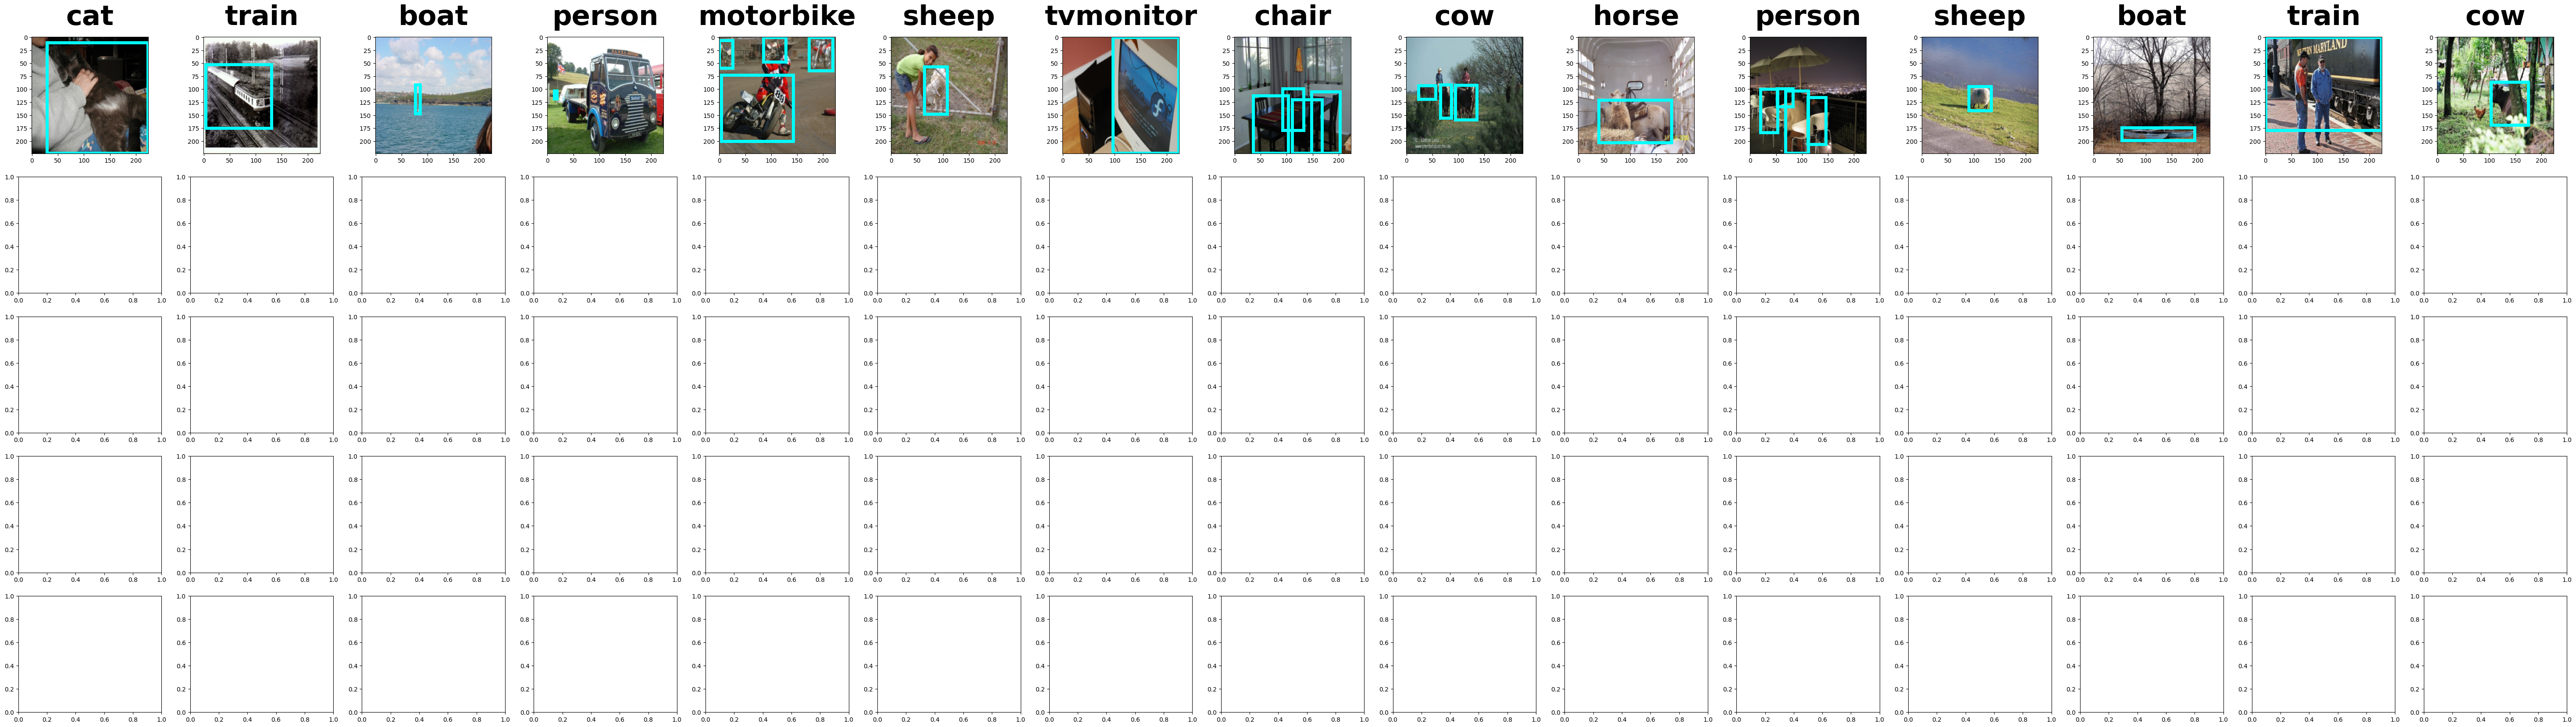

In [2]:
import torch
torch.cuda.empty_cache()

from visualize import visualize_fig2

models_names = ["B-cos", "IxG"]
models_modes = ["Baseline", "Guided"]
models_paths = [
    [
        "BASE/VOC2007/bcos_standard_attrNone_loclossNone_origNone_resnet50_lr0.0001_sll1.0_layerInput/model_checkpoint_f1_best.pt",
        "FT/VOC2007/bcos_finetunedobjlocpareto_attrBCos_loclossEnergy_origmodel_checkpoint_f1_best.pt_resnet50_lr0.0001_sll0.005_layerInput/model_checkpoint_f1_best.pt",
    ],
    [
        "BASE/VOC2007/vanilla_standard_attrNone_loclossNone_origNone_resnet50_lr0.0001_sll1.0_layerInput/model_checkpoint_f1_best.pt",
        "FT/VOC2007/vanilla_finetunedobjlocpareto_attrIxG_loclossEnergy_origmodel_checkpoint_f1_best.pt_resnet50_lr0.0001_sll0.005_layerFinal/model_checkpoint_f1_best.pt",
    ],
]
fix_layers = ["Input", "Final"]
data_path = "datasets/"
dataset = "VOC2007"
image_set = "test"
last = False


args = {
    "models_names": models_names,
    "models_modes": models_modes,
    "models_paths": models_paths,
    "fix_layers": fix_layers,
    "data_path": data_path,
    "dataset": dataset,
    "image_set": image_set,
    "last": last
}

visualize_fig2(**args)

### 5. Show the evaluation results of the fine-tuned model (Pareto front)

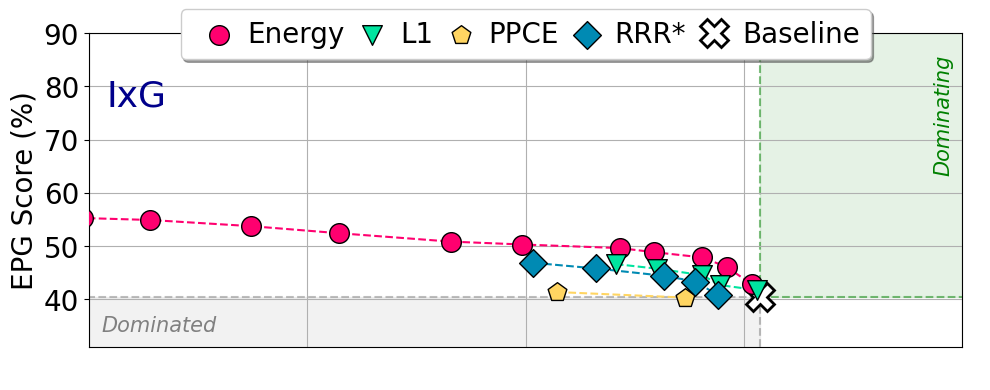

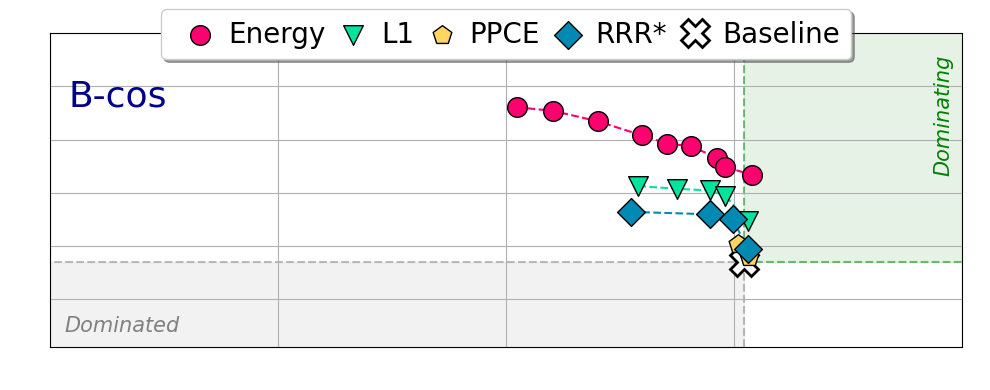

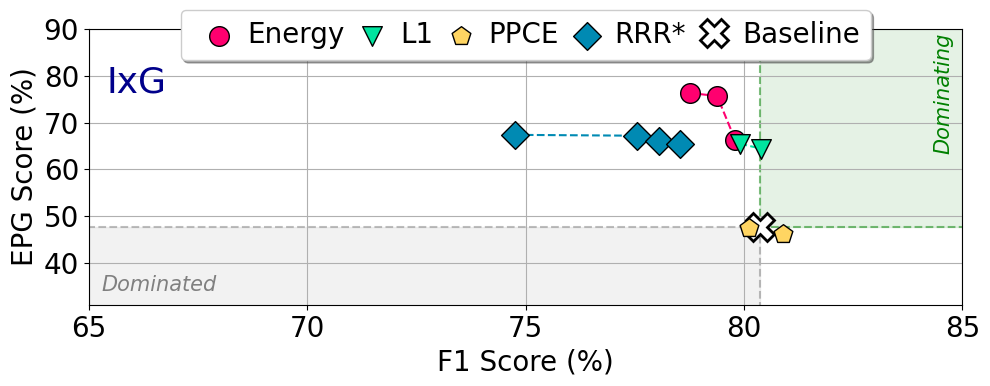

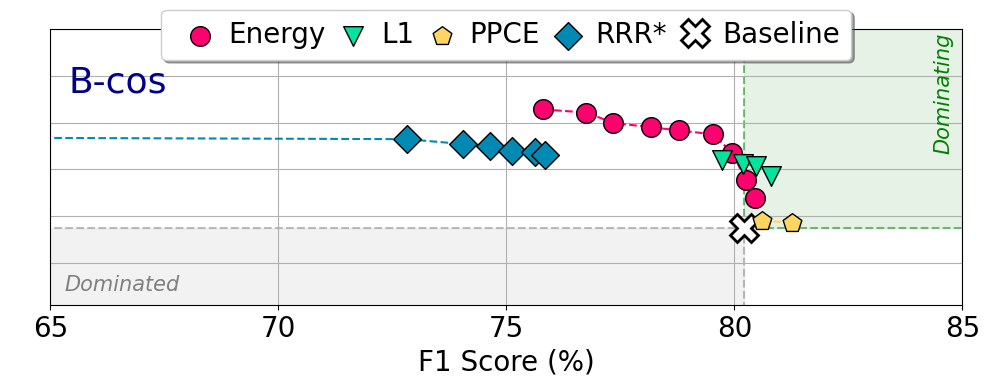

In [4]:
from utils import *
from visualize import *

root_folder = './p_curves/VOC2007'
data_f1_epg = utils.load_data_from_folders_with_npz_files(root_folder, metrics=('f_score', 'bb_score'))

x_lim_range = (65, 85)
y_lim_range = (31, 90)
step_size_xticks = 5
step_size_yticks = 10

plot_pareto_curve(
    baseline_data=data_f1_epg['vanilla']['input']['baseline'],
    energy_data=data_f1_epg['vanilla']['input']['energy'],
    l1_data=data_f1_epg['vanilla']['input']['l1'],
    ppce_data=data_f1_epg['vanilla']['input']['ppce'],
    rrr_data=data_f1_epg['vanilla']['input']['rrr'],
    x_label='F1 Score (%)',
    y_label='EPG Score (%)',
    title='',
    figsize=(10, 4),
    set_xlim=x_lim_range,
    set_ylim=y_lim_range,
    step_size_xticks=step_size_xticks,
    step_size_yticks=step_size_yticks,
    hide_x_ticks=True,
    hide_y_ticks=False,
    fontsize=20,
    attribution_method="IxG")

plot_pareto_curve(
    baseline_data=data_f1_epg['bcos']['input']['baseline'],
    energy_data=data_f1_epg['bcos']['input']['energy'],
    l1_data=data_f1_epg['bcos']['input']['l1'],
    ppce_data=data_f1_epg['bcos']['input']['ppce'],
    rrr_data=data_f1_epg['bcos']['input']['rrr'],
    x_label='F1 Score (%)',
    y_label='EPG Score (%)',
    title='',
    figsize=(10, 4),
    set_xlim=x_lim_range,
    set_ylim=y_lim_range,
    step_size_xticks=step_size_xticks,
    step_size_yticks=step_size_yticks,
    hide_x_ticks=True,
    hide_y_ticks=True,
    fontsize=20,
    attribution_method="B-cos")

plot_pareto_curve(
    baseline_data=data_f1_epg['vanilla']['final']['baseline'],
    energy_data=data_f1_epg['vanilla']['final']['energy'],
    l1_data=data_f1_epg['vanilla']['final']['l1'],
    ppce_data=data_f1_epg['vanilla']['final']['ppce'],
    rrr_data=data_f1_epg['vanilla']['final']['rrr'],
    x_label='F1 Score (%)',
    y_label='EPG Score (%)',
    title='',
    figsize=(10, 4),
    set_xlim=x_lim_range,
    set_ylim=y_lim_range,
    step_size_xticks=step_size_xticks,
    step_size_yticks=step_size_yticks,
    hide_x_ticks=False,
    hide_y_ticks=False,
    fontsize=20,
    attribution_method="IxG")

plot_pareto_curve(
    baseline_data=data_f1_epg['bcos']['final']['baseline'],
    energy_data=data_f1_epg['bcos']['final']['energy'],
    l1_data=data_f1_epg['bcos']['final']['l1'],
    ppce_data=data_f1_epg['bcos']['final']['ppce'],
    rrr_data=data_f1_epg['bcos']['final']['rrr'],
    x_label='F1 Score (%)',
    y_label='EPG Score (%)',
    title='',
    figsize=(10, 4),
    set_xlim=x_lim_range,
    set_ylim=y_lim_range,
    step_size_xticks=step_size_xticks,
    step_size_yticks=(step_size_yticks),
    hide_x_ticks=False,
    hide_y_ticks=True,
    fontsize=20,
    attribution_method="B-cos")